Analysis of clusters.

In [2]:
# loading packages
import pandas as pd
import seaborn as sns


In [3]:
# read in the output cluster table, removed commas
cl_table = pd.read_csv("tests/data/testset1_refseq_nospace_linclustDB_nocomma.tsv",
                      sep="\t", header=None)


In [4]:
cl_table.head()

,0,1
0,known_unknowns_Contig_18077_354.963:1.13115,known_unknowns_Contig_18077_354.963:1.13115
1,known_unknowns_Contig_82462_11.3453:1.1051,known_unknowns_Contig_82462_11.3453:1.1051
2,known_unknowns_Contig_4560_17.44:1.5733,known_unknowns_Contig_4560_17.44:1.5733
3,known_unknowns_Contig_4560_17.44:1.5733,_SRR1765181_Contig_4460_10.6825:1.6124
4,known_unknowns_Contig_3981_58.0174:1.1403,known_unknowns_Contig_3981_58.0174:1.1403


In [5]:
# grouping by the reference cluster name and then converting the groups to list
gp_table = cl_table.groupby(0)[1].apply(list)

In [6]:
# converting a group to dataframe
all_cl_table = pd.DataFrame(gp_table)
all_cl_table.head()

,1
0,
AC_000001.1_Ovine_adenovirus_A__complete_genome,[AC_000001.1_Ovine_adenovirus_A__complete_geno...
AC_000003.1_Canine_adenovirus_1__complete_genome,[AC_000003.1_Canine_adenovirus_1__complete_gen...
AC_000004.1_Duck_adenovirus_A__complete_genome,[AC_000004.1_Duck_adenovirus_A__complete_genom...
AC_000006.1_Human_adenovirus_D__complete_genome,[AC_000006.1_Human_adenovirus_D__complete_genome]
AC_000007.1_Human_adenovirus_2__complete_genome,[AC_000007.1_Human_adenovirus_2__complete_geno...


In [7]:
# converting list to dataframe
all_cl_df = pd.DataFrame(all_cl_table[1].apply(pd.Series).stack())
all_cl_df.columns = ["members"]
all_cl_df.tail()

members
0                                                                                
known_unknowns_Contig_9_52.291:1.6995  18   _SRR1197057_Contig_148_178.296:1.5641
                                       19   _SRR1196623_Contig_148_173.026:1.5641
                                       20   _SRR1197729_Contig_147_162.632:1.5641
                                       21    _SRR1197689_Contig_146_173.27:1.5641
known_unknowns_Contig_9_7.68311:1.1986 0   known_unknowns_Contig_9_7.68311:1.1986

/Users/migunshakya/miniconda3/envs/mash/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


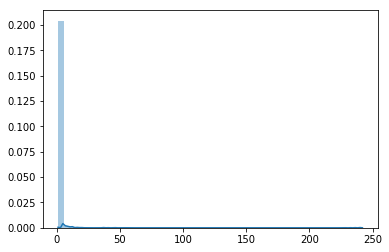

In [8]:
# Distribution of cluster size
cl_size = pd.DataFrame(all_cl_df.groupby(0).apply(len))
cl_size.columns = ["size"]
cl_size.head()
sns.distplot(cl_size['size'].tolist())

In [9]:
# clusters larger than 3
cl_nosing = cl_size[cl_size['size'] > 3]
cl_nosing.head()
#len(cl_nosing)
#sns.distplot(cl_nosing['size'].tolist())

,size
0,
NC_001367.1_Tobacco_mosaic_virus__complete_genome,5
NC_001501.1_Moloney_murine_leukemia_virus__complete_genome,5
NC_001554.1_Tomato_bushy_stunt_virus__complete_genome,10
NC_002792.2_Ribgrass_mosaic_virus__complete_genome,4
NC_003449.1_Striped_Jack_nervous_necrosis_virus__complete_genome,5


In [10]:
len_table = pd.read_csv("tests/data/testset1_refseq_nospace_nocomma.fasta.fai",
                        sep="\t", header=None, index_col=0, names=["length", "A", "B", "C"])
len_table = len_table.drop(columns=["A", "B", "C"])

In [11]:
len_table.head()

,length
known_unknowns_Contig_1456_15.8992:1.1171,1171
known_unknowns_Contig_3410_16.1664:1.1252,1252
known_unknowns_Contig_202_5.64787:1.1102,1102
known_unknowns_Contig_13078_7.69086:1.1990,1990
known_unknowns_Contig_47579_6.28328:1.2724,2724


In [12]:
len_dict=len_table.to_dict()

In [39]:
# length of contigs in each cluster
length_info = all_cl_df.replace(len_dict['length'])
length_info.head()

members
0                                                         
AC_000001.1_Ovine_adenovirus_A__complete_genome  0   33034
                                                 1   33034
AC_000003.1_Canine_adenovirus_1__complete_genome 0   30536
                                                 1   30536
AC_000004.1_Duck_adenovirus_A__complete_genome   0   33213

In [47]:
length_info_reset = length_info.reset_index()
length_info_final = length_info_reset.drop(["level_1"], axis=1)
length_info_final.head()
length_info_final.groupby(0)["members"].head()


0                                                    33034
1                                                    33034
2                                                    30536
3                                                    30536
4                                                    33213
5                                                    33213
6                                                    35100
7                                                    35937
8                                                    35937
9                                                    35938
10                                                   35524
11                                                   36519
12                                                   45063
13                                                   45063
14                                                   26263
15                                                   26263
16                                                   360

In [34]:
#length_info.groupby(0)["members"].apply(sum)
length_info.dtypes()
#len_map_table['sum']= len_map_table.sum(axis=1)
#len_map_table['SD']= len_map_table.std(axis=1)
#len_map_table.head()

TypeError: 'Series' object is not callable

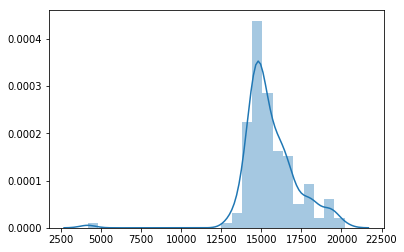

In [77]:
sns.distplot(len_map_table['sum'].tolist())